# Multiple Linear Regression

### Import libraries

In [108]:
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd

### Dataset: x_y_merged _droped_null.csv

In [109]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('x_y_merged.csv').drop(columns = ['Unnamed: 0'])
df.head()

,country_code,Country Name,year,disbursement_amount,cancer,air_pollution_death,alchol_abuse,basic_sanitation,drinking_water,hand_wash,...,tuberculosis,NTDs,doctors,poisoning,unsafe_wash,tobacco,UHC_coverage,life_expectancy,UHC_data_access,population
0,AFG,Afghanistan,2015,26063,29.8,208.1,0.21,40.71,52.39,37.59,...,189.0,13765392,2.85,1.92,13.92,35.2,34,62.35,0.49,34413603
1,AFG,Afghanistan,2016,432348,31.8,211.1,0.21,42.05,54.84,37.67,...,189.0,13275429,2.78,1.89,13.92,39.2,33,62.35,0.49,35383128
2,AGO,Angola,2015,1110667,16.9,117.5,7.96,47.37,26.71,26.38,...,366.0,18534219,0.21,3.72,48.81,42.7,37,64.50,0.31,27884381
3,AGO,Angola,2016,2013706,17.5,118.5,7.96,48.63,27.08,26.52,...,362.0,14419092,0.21,3.39,48.81,45.7,32,64.50,0.31,28842484
4,ALB,Albania,2015,1179583,17.4,105.7,6.74,97.69,89.88,45.94,...,17.0,16,12.16,0.48,0.17,29.9,58,79.69,0.31,2880703


In [110]:
df.columns

Index(['country_code', 'Country Name', 'year', 'disbursement_amount', 'cancer',
       'air_pollution_death', 'alchol_abuse', 'basic_sanitation',
       'drinking_water', 'hand_wash', 'fuel_tech', 'crude_suicide',
       'tuberculosis', 'NTDs', 'doctors', 'poisoning', 'unsafe_wash',
       'tobacco', 'UHC_coverage', 'life_expectancy', 'UHC_data_access',
       'population'],
      dtype='object')

In [111]:
# Turn categorical variables into numbers
for label, content in df.items():
    # Check columns which aren't numeric
    if not pd.api.types.is_numeric_dtype(content):
        # print the columns that are objectt type
        print(label)
        df[label] = pd.Categorical(content).codes+1

country_code
Country Name


In [112]:
df.head()

,country_code,Country Name,year,disbursement_amount,cancer,air_pollution_death,alchol_abuse,basic_sanitation,drinking_water,hand_wash,...,tuberculosis,NTDs,doctors,poisoning,unsafe_wash,tobacco,UHC_coverage,life_expectancy,UHC_data_access,population
0,1,1,2015,26063,29.8,208.1,0.21,40.71,52.39,37.59,...,189.0,13765392,2.85,1.92,13.92,35.2,34,62.35,0.49,34413603
1,1,1,2016,432348,31.8,211.1,0.21,42.05,54.84,37.67,...,189.0,13275429,2.78,1.89,13.92,39.2,33,62.35,0.49,35383128
2,2,3,2015,1110667,16.9,117.5,7.96,47.37,26.71,26.38,...,366.0,18534219,0.21,3.72,48.81,42.7,37,64.50,0.31,27884381
3,2,3,2016,2013706,17.5,118.5,7.96,48.63,27.08,26.52,...,362.0,14419092,0.21,3.39,48.81,45.7,32,64.50,0.31,28842484
4,3,2,2015,1179583,17.4,105.7,6.74,97.69,89.88,45.94,...,17.0,16,12.16,0.48,0.17,29.9,58,79.69,0.31,2880703


### Variable exploration

In [113]:
X = df[['country_code', 'Country Name', 'year', 'cancer',
        'air_pollution_death', 'alchol_abuse', 'basic_sanitation',
        'drinking_water', 'hand_wash', 'fuel_tech', 'crude_suicide',
       'tuberculosis', 'NTDs', 'doctors', 'poisoning', 'unsafe_wash',
       'tobacco', 'UHC_coverage', 'life_expectancy', 'UHC_data_access',
       'population']]

y = df["disbursement_amount"].values.reshape(-1, 1)
print(X.shape, y.shape)

(150, 21) (150, 1)


## identify outlier

In [114]:
#Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

#Create data frame
df = pd.DataFrame(X)

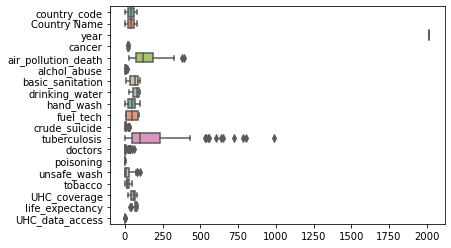

In [115]:
#df.describe()

df_2 = df[['country_code', 'Country Name', 'year', 'cancer',
       'air_pollution_death', 'alchol_abuse', 'basic_sanitation',
       'drinking_water', 'hand_wash', 'fuel_tech', 'crude_suicide',
       'tuberculosis', 'doctors', 'poisoning', 'unsafe_wash',
       'tobacco', 'UHC_coverage', 'life_expectancy', 'UHC_data_access']]


ax = sns.boxplot(data=df_2, orient="h", palette="Set2")

### correlation matrix

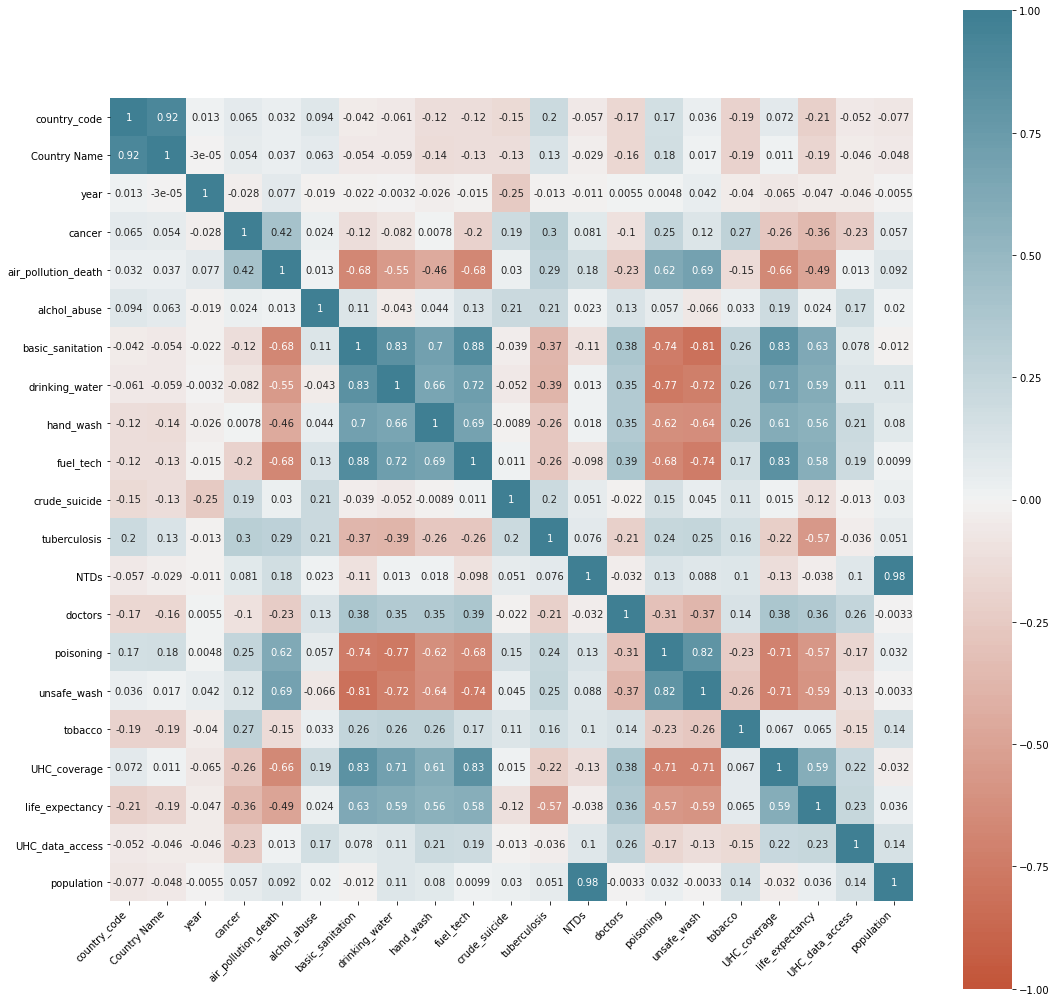

In [116]:
# Correlation Matrix
f = plt.figure(figsize=(18, 18))

corr = df.corr()
ax = sn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.savefig('corrMatrix.png', bbox_inches='tight')

###  Create the model using LinearRegression

In [117]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Coefficient

In [118]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[[-3.79965960e+04  3.38046631e+04  2.20081899e+06 -2.45897964e+05
   5.18977066e+03  1.65826921e+05  3.19311477e+04 -6.55285502e+03
   5.38730391e+03 -3.33738340e+04  6.34920342e+04  4.42407001e+03
   6.83428995e-04 -2.55255423e+03  4.42368112e+05 -4.68858628e+04
  -1.06793405e+04  1.10876533e+04 -1.17074122e+05  2.89529972e+06
  -5.97000062e-04]]


In [119]:
from sklearn import linear_model
import statsmodels.api as sm
# with statsmodels

 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.576
Model:                            OLS   Adj. R-squared (uncentered):              0.507
Method:                 Least Squares   F-statistic:                              8.342
Date:                Sun, 26 Sep 2021   Prob (F-statistic):                    1.58e-15
Time:                        17:46:36   Log-Likelihood:                         -2434.1
No. Observations:                 150   AIC:                                      4910.
Df Residuals:                     129   BIC:                                      4974.
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### Fit the model to the training data and calculate the scores for the training and testing data

In [72]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

AttributeError: 'OLSResults' object has no attribute 'fit'

In [ ]:
### Plot the Residuals for the Training and Testing data

In [ ]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")